In [3]:
# 載入相關套件
import numpy as np       #數學處理
import pandas as pd       #資料處理
import matplotlib.pyplot as plt #繪圖
import seaborn as sns

In [4]:
data=pd.read_csv('train_dataset.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
451,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
452,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
453,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
# 缺失值、異常值處理
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    int64  
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    int64  
 9   TAX      455 non-null    int64  
 10  PIRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
 13  PRICE    455 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 49.9 KB


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PIRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

沒有缺失值、異常值

In [7]:
d = pd.DataFrame(data) #特徵只有一個欄位:x
# 查看資料分布狀況
d.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.072527,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.259645,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.000000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.000000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.000000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


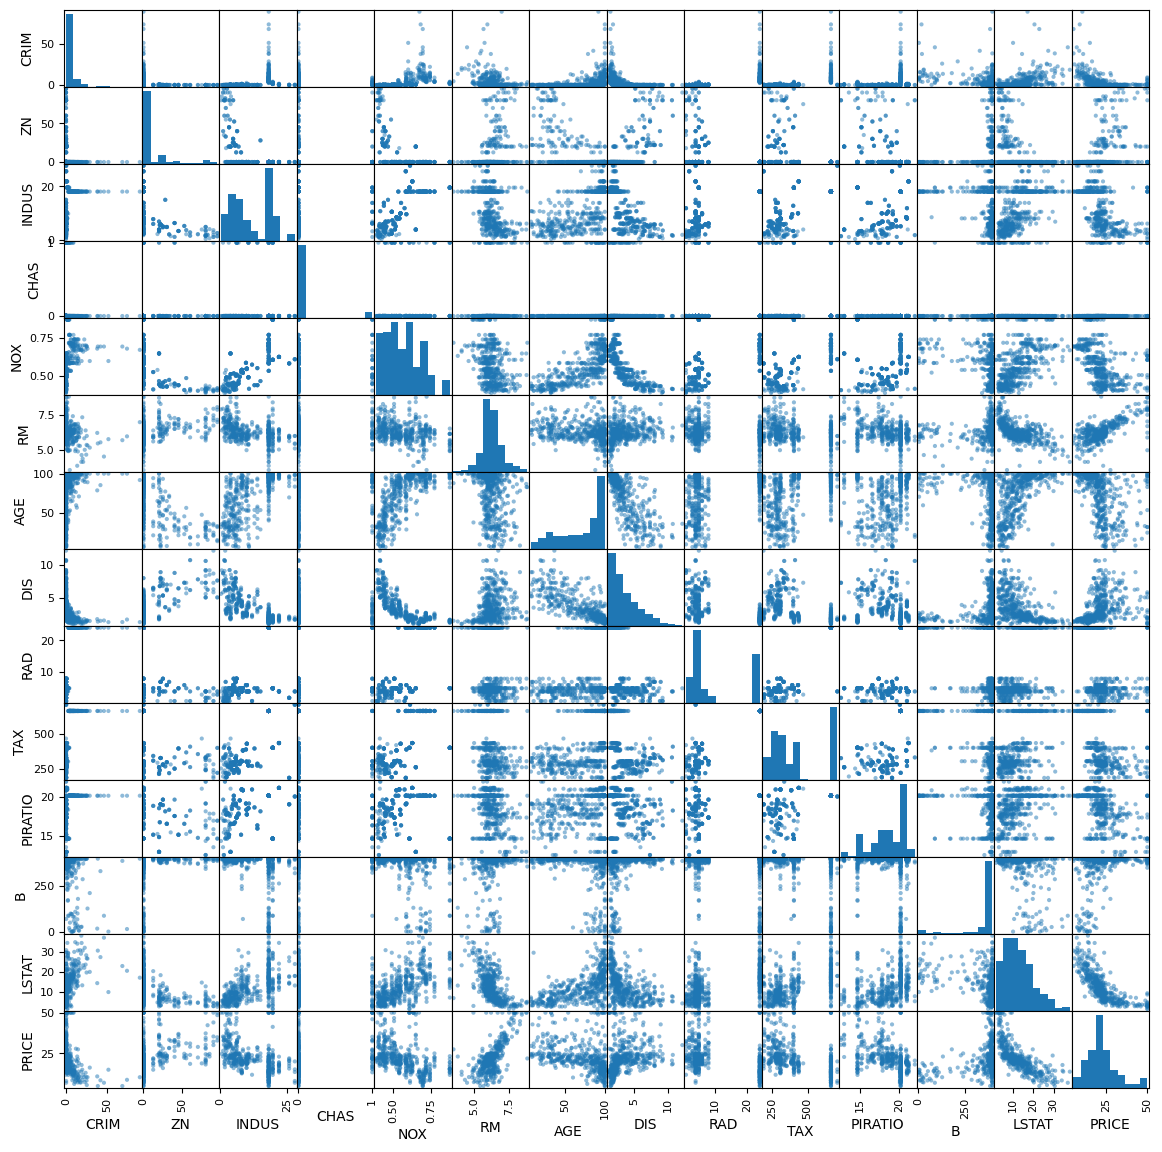

In [8]:
# 多欄位彼此關係
from pandas.plotting import scatter_matrix
_=scatter_matrix(data,figsize=(14,14))

In [9]:
# 求出四分位距(IQR)=Q3-Q1與上邊界(天花板)和下邊界(地板)
Q1=d['PRICE'].quantile(0.25)
Q3=d['PRICE'].quantile(0.75)
IQR=Q3-Q1
Upper=Q3+1.5*IQR
Lower=Q1-1.5*IQR
print('Q3=',Q3,'Q1=',Q1,'IQR=',IQR,'Upper=',Upper,'Lower=',Lower)

Q3= 24.8 Q1= 16.45 IQR= 8.350000000000001 Upper= 37.325 Lower= 3.924999999999997


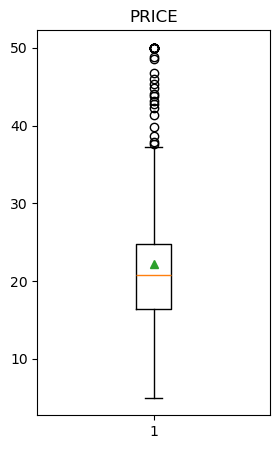

In [10]:
#合鬚圖
plt.figure(figsize=(3,5))
plt.boxplot(d['PRICE'],showmeans=True)
plt.title('PRICE')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11928\2204470728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['PRICE'])


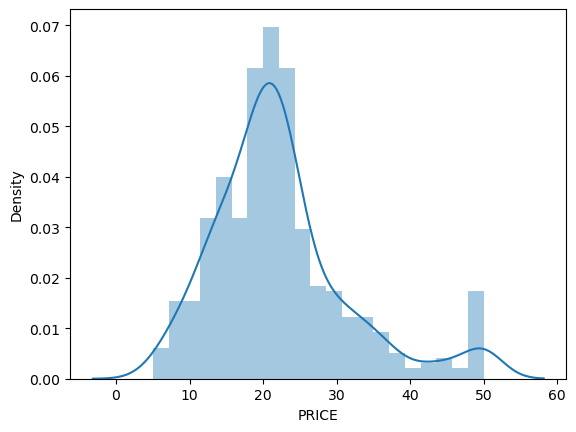

In [11]:
sns.distplot(d['PRICE'])
plt.show()

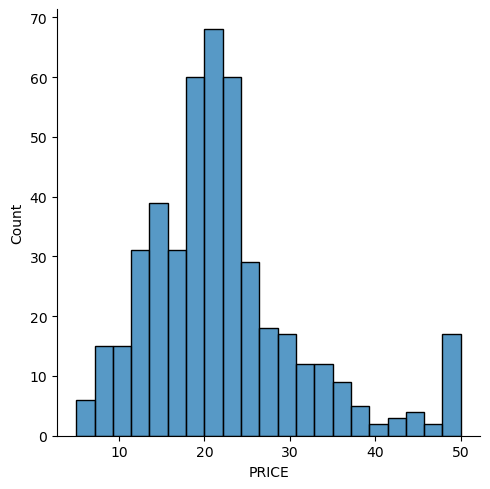

In [12]:
#常態分佈圖
sns.displot(d['PRICE'])
plt.show()

In [13]:
#皮爾森(Pearson) 相關係數
#取前三名特徵值
featuresCorr = d.corr()
featuresCorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.205632,0.393648,-0.063570,0.411682,-0.220061,0.352572,-0.374492,0.618479,0.576025,0.295547,-0.376427,0.459179,-0.396399
ZN,-0.205632,1.000000,-0.547377,-0.040380,-0.524176,0.323751,-0.593847,0.689340,-0.324597,-0.326639,-0.384478,0.177723,-0.419877,0.371222
INDUS,0.393648,-0.547377,1.000000,0.057280,0.763555,-0.385453,0.658030,-0.706997,0.584828,0.710938,0.379742,-0.346107,0.603247,-0.480399
CHAS,-0.063570,-0.040380,0.057280,1.000000,0.090169,0.106596,0.080590,-0.089910,-0.017006,-0.044141,-0.136945,0.057294,-0.065662,0.195238
NOX,0.411682,-0.524176,0.763555,0.090169,1.000000,-0.306766,0.731362,-0.765282,0.605601,0.666606,0.185077,-0.373051,0.587855,-0.437933
RM,-0.220061,0.323751,-0.385453,0.106596,-0.306766,1.000000,-0.242714,0.214605,-0.215386,-0.287723,-0.344080,0.123747,-0.608875,0.669990
AGE,0.352572,-0.593847,0.658030,0.080590,0.731362,-0.242714,1.000000,-0.767679,0.456682,0.512556,0.264659,-0.271744,0.588139,-0.387366
DIS,-0.374492,0.689340,-0.706997,-0.089910,-0.765282,0.214605,-0.767679,1.000000,-0.488798,-0.528311,-0.236137,0.285021,-0.502574,0.259980
RAD,0.618479,-0.324597,0.584828,-0.017006,0.605601,-0.215386,0.456682,-0.488798,1.000000,0.912462,0.486445,-0.435313,0.494911,-0.394492
TAX,0.576025,-0.326639,0.710938,-0.044141,0.666606,-0.287723,0.512556,-0.528311,0.912462,1.000000,0.483593,-0.432537,0.547513,-0.472499


<Axes: >

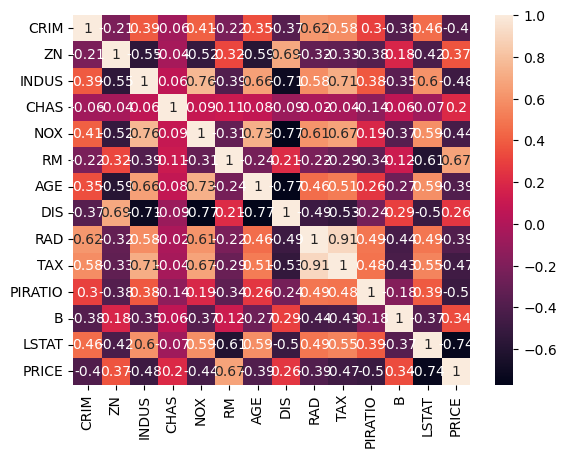

In [14]:
# 熱力圖
correlation_matrix = data.corr().round(2)
# .round(2) 將計算出的相關係數四捨五入到小數點後兩位
# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data=correlation_matrix, annot = True)

In [15]:
target = featuresCorr.iloc[:, -1]
target

CRIM      -0.396399
ZN         0.371222
INDUS     -0.480399
CHAS       0.195238
NOX       -0.437933
RM         0.669990
AGE       -0.387366
DIS        0.259980
RAD       -0.394492
TAX       -0.472499
PIRATIO   -0.502491
B          0.338793
LSTAT     -0.742985
PRICE      1.000000
Name: PRICE, dtype: float64

In [16]:
targetCorr = featuresCorr['PRICE']
targetCorr = targetCorr.drop('PRICE')
selectedFeatures = targetCorr[abs(targetCorr) > 0.51]
print("選擇特徵數： {} \n選擇特徵:\n{}".
      format(len(selectedFeatures), selectedFeatures))

選擇特徵數： 2 
選擇特徵:
RM       0.669990
LSTAT   -0.742985
Name: PRICE, dtype: float64


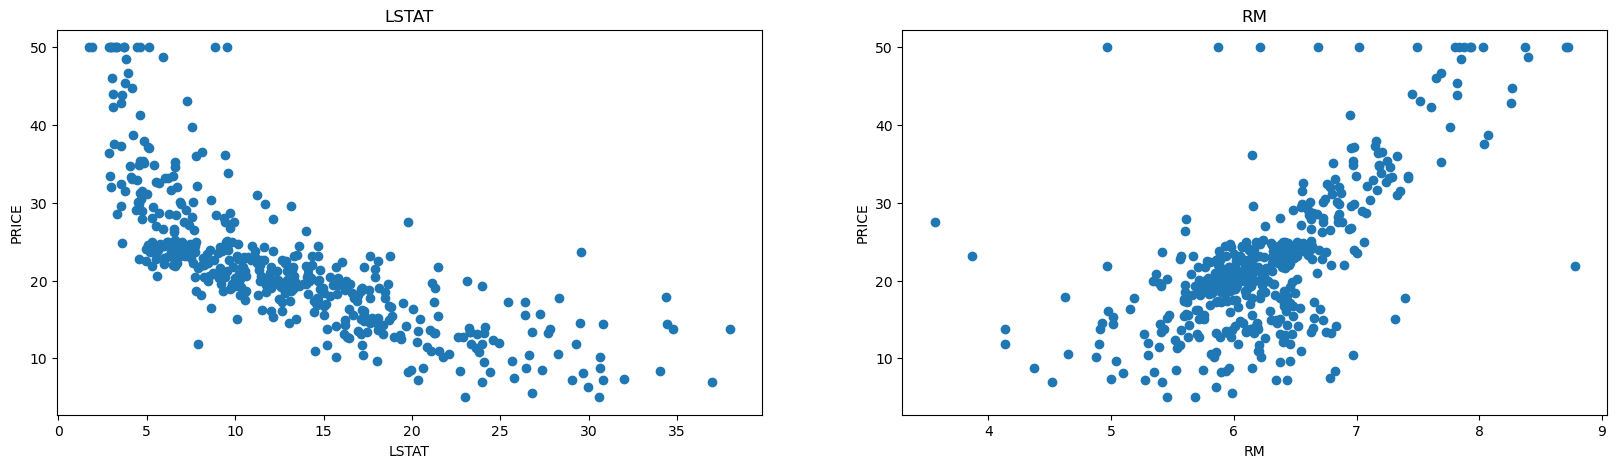

In [17]:
# LSTAT和RM與房價的線性關係
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = data['PRICE']  # This should work now

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

plt.show()

LSTAT和PRICE是負向關係
RM和PRICE正向關係

In [18]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['PRICE']

In [20]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape)
print(Y_test.shape)

(364, 2)
(91, 2)
(364,)
(91,)


In [21]:
# Modeling
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 學習/訓練Fitting linear model
reg.fit(X_train,Y_train)
# 預測結果Predicting using the linear model
reg.predict(X_test)
# 真實結果：Y_test
# 測試準確度：
print('R2: ', reg.score(X_test, Y_test))

R2:  0.5882694334342211


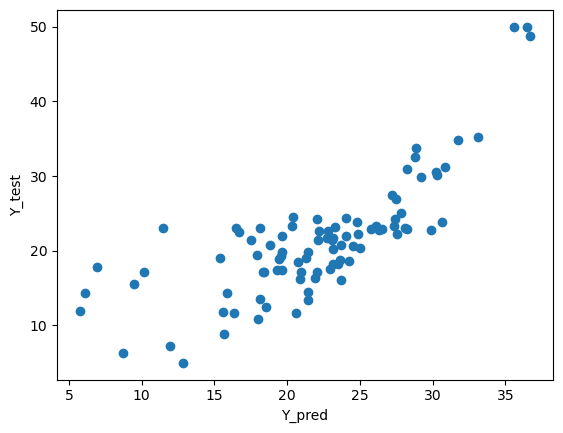

In [22]:
# plotting the y_test vs y_pred
Y_pred = reg.predict(X_test)
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

In [23]:
reg.intercept_

3.6396300716228147

In [24]:
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
LSTAT,-0.695375
RM,4.428360


關係式:
PRICE = 3.64 + (-0.695375) *LSTAT + 4.428360 *RM + +error